# CS6140 Assignments

**Instructions**
1. In each assignment cell, look for the block:
 ```
  #BEGIN YOUR CODE
  raise NotImplementedError.new()
  #END YOUR CODE
 ```
1. Replace this block with your solution.
1. Test your solution by running the cells following your block (indicated by ##TEST##)
1. Click the "Validate" button above to validate the work.

**Notes**
* You may add other cells and functions as needed
* Keep all code in the same notebook
* In order to receive credit, code must "Validate" on the JupyterHub server

---

# Assignment 9: Neural Networks

In this assignment we will implement the [Backpropagation](https://en.wikipedia.org/wiki/Backpropagation) algorithm for a neural network using a computational graph. 

Each node in the network has a reference to is ancestor (not successor nodes), as follows:
![Network configuration](assignment-9.png)

We will be implementing the nodes defined above, including their ```forward``` and ```backward``` passes. In the forward pass, the node reads its input and calculates an ```activation``` which it then retains for the next layer. In the backward pass, the partial derivative of output with respect to a variable is calculated in the ```pderv``` function, recursively through the graph. Nodes are connected by setting the respecitve back pointers in the ```connect``` function.

In [1]:
require './assignment_lib.rb'

rng = Distribution::Normal.rng(0,1, 293891)

def connect src, dst
  dst.back_net[src.name] = src
end

concentric_circle_data = concentric_dataset()
xor_data = xor_dataset(rng)
two_means_data = generate_synthetic_data(rng)
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

## Question 1: Input

Implement the ```Input``` node which contains a single column of a vector. The value of the variable held by an ```Input``` object is set by calling the ```activation``` accessor directly. In previous assignments we specify a row in a dataset as a hash of features, such as the following:

```ruby
example = {"features" => {"x1" => 1.0, "x2" => 3.0}}
```

Now, the ```Input``` node holds the value of a single column. Each node has a name which represents the variable is knows about. The above statement is equivalent to initializing two ```Input``` nodes once as follows:

```ruby
x1 = Input.new "x1"
x2 = Input.new "x2"
```

Each subsequent example sets the activation value directly, as follows:

```ruby
x1.activation = 1.0
x2.activation = 3.0
```

## Question 1.1 (5 points)

Implement the ```forward``` method which calculates the activation and stores it in a member variable.

In [2]:
class Input
  attr_accessor :activation
  attr_reader :back_net
  attr_reader :name
  
  def initialize name    
    @name = name
    @back_net = nil
  end

  def forward
    forward=@activation
  end
end
nil

In [3]:
def test_input_forward
  i = Input.new "x1"
  assert_not_nil i
  assert_nil i.activation

  i.activation = 1.0
  assert_equal 1.0, i.activation

  assert_equal 1.0, i.forward

  i.activation = 2.0
  assert_equal 2.0, i.forward
end
test_input_forward()

## Question 1.2 (5 points)

Implement the ```pderv``` method which calculates partial derivative of the input with respect to ```name```. That is, this method calculates:

$\begin{align}
\frac{\partial x}{\partial \text{name}}
\end{align}$

where $x$ is an ```Input``` object.

There are two possible derivative values here, when the ```name``` is the variable represented by the input node and when it isn't.

In [5]:
class Input
  def pderv name
    if name==@name
      return 1.0
    else
      return 0.0
    end
  end
end

:pderv

In [6]:
def test_input_pderv
  i = Input.new "x"
  i.activation = 7.1
  
  assert_equal 1.0, i.pderv("x")
  assert_equal 0.0, i.pderv("another_variable")
end
test_input_pderv()

## Question 2.1 (5 points)

Implement the $L_2$ loss function assuming that there is an ```incoming``` node whose ```activation``` is known. Feedback is provided by explicitly setting ```feedback```.

In [7]:
class L2Loss
  attr_reader :activation
  attr_reader :back_net
  attr_reader :name
  attr_accessor :feedback

  def initialize
    @back_net = Hash.new    
  end
  
  def incoming
    @back_net.values.first
  end

  
  def forward
    @activation=incoming.activation 

  end
  
end

:forward

In [8]:
def test_l2loss_forward
  l2loss = L2Loss.new
  i = Input.new "x1"
  connect i, l2loss
  
  i.activation = 7.5
  assert_in_delta 7.5, l2loss.forward, 1e-4
  assert_in_delta 7.5, l2loss.activation, 1e-4
end

test_l2loss_forward()

## Question 2.2 (5 points)

Implement the $L_2$ loss fuction based on the ```activation``` and ```feedback```.

In [9]:
class L2Loss
  def loss
    return 0.5*(@activation-@feedback)**2
  end
end

:loss

In [139]:
def test_l2loss_loss
  l2loss = L2Loss.new
  i = Input.new "x1"
  connect i, l2loss
  
  i.activation = 7.5
  l2loss.forward
  l2loss.feedback = 1.0
  assert_in_delta 21.125, l2loss.loss, 1e-4
end
test_l2loss_loss()

## Question 2.3 (5 points)

Implement the partial derivative function $L_2$ loss fuction based on the ```activation``` and ```feedback```. 

In [10]:
class L2Loss  
  def pderv fname 
    return (@activation-@feedback)*@back_net.values.first.pderv(fname)
  end
end

:pderv

In [11]:
def test_l2loss_pderv
  l2loss = L2Loss.new
  i = Input.new "x1"
  connect i, l2loss
  
  i.activation = 7.5
  l2loss.forward
  l2loss.feedback = 1.0
  assert_in_delta 6.5, l2loss.pderv("x1"), 1e-4
  assert_in_delta 0.0, l2loss.pderv("some_other_variable"), 1e-4
end
test_l2loss_pderv()

## Question 2.4 (5 points)

Implement log loss, where the activation is assumed to take the sigmoid of the input. The partial derivative uses the same form as in [Assignment 4](assignment-4/assignment-4.ipynb).


In [12]:
class LogLoss
  attr_reader :activation
  attr_reader :back_net
  attr_reader :name
  attr_accessor :feedback

  def initialize
    @back_net = Hash.new
  end
  
  def incoming
    @back_net.values.first
  end

  def forward    
    @activation=(1/(1+Math.exp(-1*incoming.activation)))
  end
  
  def pderv fname    
      x = incoming.pderv(fname)
      a = -1*(1-@activation)*x
      b = @activation*x
      return (a*@feedback+b*(1-@feedback))
  end
  
  def loss
    a = Math.log(@activation)
    b = Math.log(1-@activation)
    return -1.0*(a*(@feedback)+b*(1-@feedback))
  end
end



:loss

In [13]:
def test_logloss
  logloss = LogLoss.new
  i = Input.new "x1"
  connect i, logloss
  
  i.activation = 0.77
  assert_in_delta 0.6835208937, logloss.forward, 1e-4
  
  logloss.feedback = 1
  assert_in_delta -0.3164791063, logloss.pderv("x1"), 1e-4  
  assert_in_delta 0.3804980545, logloss.loss, 1e-4
end
test_logloss()

## Question 3.1 (5 points)

Implement the Sigmoid activation function. Given the incoming value $x$, the ```forward``` function calculates ```@activation``` as the sigmoid of x, or:

$
\begin{align}
\sigma(x) = \frac{1}{1+ e^{-x}}
\end{align}
$

In the ```pderv``` function, calculate the partial derivative of the activation function and apply the derivative to the ```back_net``` variables. 

In [14]:
class Sigmoid
  attr_reader :activation
  attr_reader :name
  attr_reader :back_net
  
  def initialize name = "_"
    @name = name
    @back_net = Hash.new
  end
  
  def incoming
    @back_net.values.first
  end
  
  def forward    
    @activation=(1/(1+Math.exp(-1*incoming.activation)))
  end
  
  def pderv fname    
      return (1-@activation)*(@activation)*incoming.pderv(fname)
  end
end

:pderv

In [15]:
def test_sigmoid
  i = Input.new "x1"
  i.activation = 0.0

  sig = Sigmoid.new "s"
  connect i, sig

  s1 = sig.forward
  assert_in_delta 0.5, s1, 1e-4, "sig(0.5)"
  p1 = sig.pderv "x1"
  assert_in_delta 0.25, p1, 1e-4, "pderv(0.5)"

  
  i.activation = 0.775
  s2 = sig.forward
  assert_in_delta 0.6846015003, s2, 1e-4, "sig(0.775)"
  p2 = sig.pderv "x1"
  assert_in_delta 0.2159222861, p2, 1e-4, "pderv(0.775)"
  
  p3 = sig.pderv "some_other_variable"
  assert_in_delta 0.0, p3, 1e-4, "pderv(other)"
end

test_sigmoid()


## Question 3.2 (5 points)

Implement the ReLU activation function. Given the incoming value $x$, the ```forward``` function calculates ```@activation``` as a function of x, as follows:

$
\begin{align}
\text{ReLU}(x) = \max \left\{ 0, x \right\}
\end{align}
$

In the ```pderv``` function, calculate the partial derivative of the activation function and apply the derivative to the ```back_net``` variables. 

In [16]:
class ReLU
  attr_reader :activation
  attr_reader :name
  attr_reader :back_net
  
  def initialize name
    @name = name
    @back_net = Hash.new
  end
  
  def incoming
    @back_net.values.first
  end

   def forward    
    @activation=[0.0,incoming.activation].max
  end
  
  def pderv fname
    if incoming.activation > 0.0
      return incoming.pderv(fname)
    else
      return 0.0
    end
  end
end



:pderv

In [17]:
def test_relu
  i = Input.new "x1"
  i.activation = 0.5

  relu = ReLU.new "s"
  connect i, relu

  s1 = relu.forward
  assert_in_delta 0.5, s1, 1e-4, "relu(0.5)"
  p1 = relu.pderv "x1"
  assert_in_delta 1.0, p1, 1e-4, "pderv(0.5)"

  
  i.activation = -0.775
  s2 = relu.forward
  assert_in_delta 0.0, s2, 1e-4, "relu(-0.775)"
  p2 = relu.pderv "x1"
  assert_in_delta 0.0, p2, 1e-4, "pderv(-0.775)"
  
  p3 = relu.pderv "some_other_variable"
  assert_in_delta 0.0, p3, 1e-4, "pderv(other)"
end

test_relu()


## Question 4.1 (5 points)

The ```LinearUnit``` calculates the inner product between the input activations and an internal weight vector. The weight vector is stored as a reference that is common across the whole network. Therefore, each feature name needs to be unique. 

The diagram below shows the network configuration for Logstic Regression. Multiple ```Input``` units are connected to the ```LinearUnit```, which connected to the ```Sigmoid``` activation function. The activation function is then connected to the ```L2Loss``` output node. 

![Network configuration](assignment-9-Page-2.png)

In the ```forward``` function, each input node in the ```back_net``` has an activation. Assume there is a pre-defined weight for the bias.

In [18]:
class LinearUnit
  attr_reader :activation
  attr_reader :back_net
  attr_reader :name
  
  def initialize name, weights
    @name = name
    @weights = weights
    @back_net = Hash.new    
  end
  
  def update weights
    @weights = weights
  end    

  def n fname
    [@name, fname].join(".")
  end
  
  def forward
    @activation = @weights[n("bias")]
    backSize = @back_net.size
    
    backSize.times do |i|
      @activation += (@back_net.values[i].activation)*(@weights[n(@back_net.values[i].name)])
    end
    
    return @activation
  end
end

:forward

In [19]:
def test_linear_forward
  weights = Hash.new {|h,k| h[k] = 0.7}
  linear = LinearUnit.new("f", weights)
  assert_not_nil linear
  assert_true(linear.back_net.empty?)
  
  i = Input.new "x1"
  i.activation = 0.2
  
  connect i, linear
  assert_same i, linear.back_net["x1"]
  
  assert_in_delta 0.2 * 0.7 + 0.7, linear.forward, 1e-4
  assert_in_delta 0.7, weights["f.x1"], 1e-4
  assert_in_delta 0.7, weights["f.bias"], 1e-4
  assert_equal 2, weights.size

end

test_linear_forward()

## Question 4.2 (5 points)

The partial derivative function for the ```LinearUnit``` has two cases. In the ```pderv_weights``` below, calculate the partial derivative for weight variables.

In [20]:
class LinearUnit
  def pderv_weights name
    backSize = @back_net.size
    derv = 0.0
    
    backSize.times do |i|
      if n(@back_net.values[i].name) == name
        derv += (@back_net.values[i].activation)
      end
    end
    
    if n("bias") == name
      derv += 1.0
    end
    
    return derv
  end
  
  def pderv name
    pderv_weights name
  end
end

:pderv

In [21]:
def test_linear_pderv_weights
  weights = Hash.new {|h,k| h[k] = 0.7}
  linear = LinearUnit.new("f", weights)
  assert_not_nil linear

  i = Input.new "x1"
  i.activation = 0.2  
  connect i, linear

  i.forward
  act = linear.forward

  assert_in_delta 0.2, linear.pderv_weights("f.x1"), 1e-4
  assert_in_delta 1.0, linear.pderv_weights("f.bias"), 1e-4
end
test_linear_pderv_weights()

## Question 4.3 (5 points)

Considering the dataset below, copy **your** ```StochasticGradientDescent``` and train a logistic regression model. Make two changes to your trainer:

1. Keep learning rate is fixed, i.e., do not try to reduce the learning rate.
1. Divide by the size of the mini-batch in the SGD not in gradient calculation

The ```LogisticRegression``` function should implement these steps just like every other model we used:

1. ```forward```: Calls the forward function for the input, linear unit, activation, and output nodes.
1. ```func```: Calculate the total $L_2$ loss under a sigmoid activation function for all examples in the dataset.
1. ```grad```: Calculate the total gradient vector for all parameters in the function. im


Because the implementation above takes one row at a time, it will call the forward operation again in ```func``` and ```grad```.


Paste **your** implementation of the AUCMetric class here.

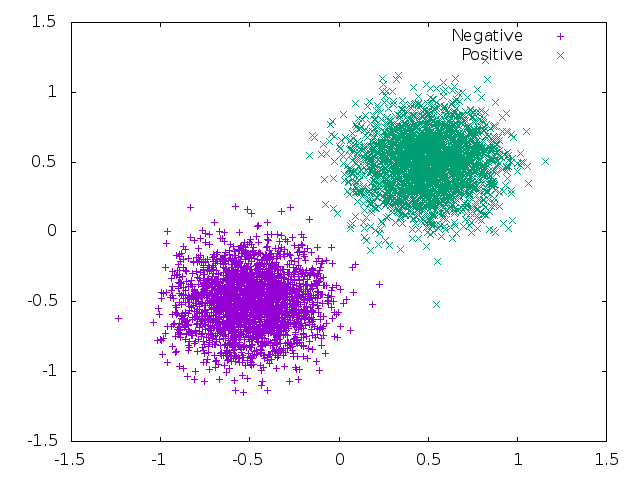

In [22]:
module Metric
  def apply scores
  end
end

plot_dataset(two_means_data)

In [23]:
class AUCMetric 
  include Metric
  def roc_curve(scores)
    
    allP = 0.0
    allN = 0.0

    scores.size.times do |i|
      if (scores[i][1]==1)
        allP += 1.0
      else
        allN += 1.0
      end
    end
    
    falsePositive = allN
    truePositive = allP

    fp = [1.0]
    tp = [1.0]
    auc = 0.0
    sorted = scores.sort_by {|score| score[0]}
          
    sorted.size.times do |i|
      
      if sorted[i][1] != 1.0
        falsePositive -= 1.0
      else
        truePositive -= 1.0
      end
      
      ratioFP = falsePositive/allN
      ratioTP = truePositive/allP
      
      auc += -0.5*(ratioTP + tp.last)*(ratioFP - fp.last)
      fp.push(ratioFP)
      tp.push(ratioTP)      
    end
   
    return [fp, tp, auc]
  end
  
  def apply scores
    fp, tp, auc = roc_curve scores
    return auc
  end
end

:apply

In [24]:
class StochasticGradientDescent
  attr_reader :weights
  attr_reader :objective
  def initialize obj, w_0, lr = 0.01
    @objective = obj
    @weights = w_0
    @n = 1.0
    @lr = lr
  end
  def update x
    dw = @objective.grad(x, @weights)
    learning_rate = @lr/1.0
    
    dwSize = dw.size
    dwSize.times do |i|
      dwKey = dw.keys[i]
      unless weights[dwKey].nil?
        weights[dwKey] = weights[dwKey] - learning_rate * dw[dwKey]
      end
    end
    
    @n = @n + 1
   
    @objective.adjust(weights)
    
  end
end

:update

In [25]:
class LogisticRegression
  def initialize weights
    @x1 = Input.new "x1"
    @x2 = Input.new "x2"
    @inner = LinearUnit.new "wx", weights
    @sig = Sigmoid.new "sig"
    @out = L2Loss.new
    
    connect @x1, @inner
    connect @x2, @inner
    connect @inner, @sig
    connect @sig, @out
  end
  
  def predict examples
    examples.collect {|row| forward row}
  end
  
  def forward row
    @x1.activation = row["features"]["x1"]
    @x2.activation = row["features"]["x2"]
    
    @x1.forward
    @x2.forward
    @inner.forward
    @sig.forward
    @out.forward
  end
  
  def func dataset, weights
    sum = 0.0
    dataSize = dataset.size    
    @inner.update(weights)
    
    dataSize.times do |i|
      forward(dataset[i])
      
      if dataset[i]["label"] > 0.0
        @out.feedback = 1.0
      else
        @out.feedback = 0.0
      end
          
      sum += @out.loss
    end  
    
    return sum   
  end
  
  def grad data, weights
    g = Hash.new {|h,k| h[k] = 0.0}
    dataSize = data.size    
    
    dataSize.times do |i|
      forward(data[i])
      if data[i]["label"] > 0.0
        @out.feedback = 1.0
      else
        @out.feedback = 0.0
      end
      @out.feedback = data[i]["label"]
      g[@inner.n("x1")] += @out.pderv(@inner.n("x1"))
      g[@inner.n("x2")] += @out.pderv(@inner.n("x2"))
      g[@inner.n("bias")] += @out.pderv(@inner.n("bias"))
    end
    
    g
  end
  
  def adjust weights
    weights
  end
end


:adjust

In [26]:
def test_logistic_regression data

  cumulative_loss = 0.0
  i = 0
  weights = Hash.new {|h,k| h[k] = 0.0}
  obj = LogisticRegression.new weights
  sgd = StochasticGradientDescent.new obj, weights, 0.02
  5.times do |epoch|
    data.each_slice(20) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts cumulative_loss / i if i % 100 == 0
    end
  end

  predictions = obj.predict data
  scores = predictions.collect.with_index {|score, i| [score, data[i]["label"] > 0 ? 1 : 0]}
  auc = AUCMetric.new.apply scores
  puts "AUC: #{auc}"
  
  assert_true(0.5 >= (cumulative_loss / i), "Loss < 0.5")
  assert_true(auc > 0.9, "AUC > 0.9")
  
  return obj
end

trained_lr_model = test_logistic_regression(two_means_data)
nil

0.90542616472143
0.6104101631905029
0.47069495821248325
0.3882396423820498
0.3347111198911824
0.295306408718129
0.2667433293210993
0.24361850295507867
0.2243580381251961
0.20885286461976504
0.19540174829747625
0.18443870189616576
AUC: 0.9999999999999449


In [27]:
def test_logistic_regression data
  cumulative_loss = 0.0
  i = 0
  weights = Hash.new {|h,k| h[k] = 0.0}
  obj = LogisticRegression.new weights
  sgd = StochasticGradientDescent.new obj, weights, 0.02
  5.times do |epoch|
    data.each_slice(20) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts cumulative_loss / i if i % 100 == 0
    end
  end
  
  puts weights  
  predictions = obj.predict data
  scores = predictions.collect.with_index {|score, i| [score, data[i]["label"] > 0 ? 1 : 0]}
  auc = AUCMetric.new.apply scores
  puts "AUC: #{auc}"
  
  assert_true(0.5 >= (cumulative_loss / i), "Loss < 0.5")
  assert_true(auc > 0.9, "AUC > 0.9")
  
  return obj
end

trained_lr_model = test_logistic_regression(two_means_data)
nil

0.90542616472143
0.6104101631905029
0.47069495821248325
0.3882396423820498
0.3347111198911824
0.295306408718129
0.2667433293210993
0.24361850295507867
0.2243580381251961
0.20885286461976504
0.19540174829747625
0.18443870189616576
{"wx.bias"=>-1.0995869788024142, "wx.x1"=>4.578322816283631, "wx.x2"=>4.549017839415917}
AUC: 0.9999999999999449


### Observe
The following plot of the decision boundary should show a higher values for the positive class.

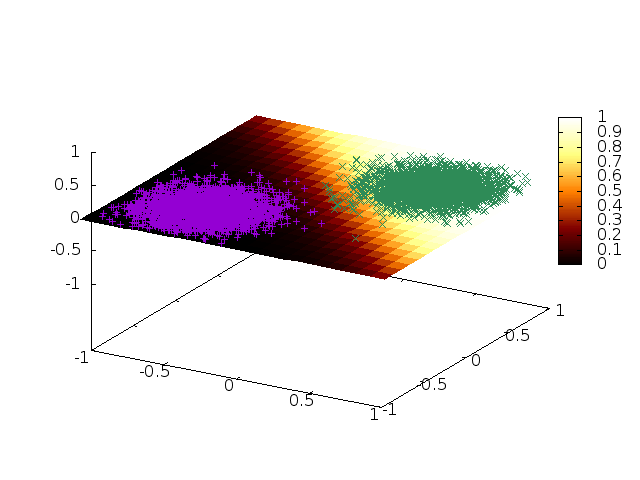

In [28]:
plot_decision_boundary(two_means_data, trained_lr_model)

## Question 5.1 (5 points)

Neural networks connect multiple linear units together. Testing that this works. No additional code needed here, just another test.

In [29]:
def test_hidden_forward
  weights = {
      "h0.x1" => 1.0, "h0.bias" => 0.0,
      "h1.x1" => 2.0, "h1.bias" => 0.0,
      "f0.h0" => 3.0, "f0.h1" => 4.0, "f0.bias" => 0.0
    }
  h0 = LinearUnit.new("h0", weights)
  h1 = LinearUnit.new("h1", weights)
  f0 = LinearUnit.new("f0", weights)
  
  i = Input.new "x1"  
  i.activation = 0.2
  
  connect i, h0
  connect i, h1
  
  connect h0, f0
  connect h1, f0

  i.forward
  h0.forward
  h1.forward
  f0.forward

  assert_in_delta 0.2, h0.activation, 1e-4, "h0"
  assert_in_delta 0.4, h1.activation, 1e-4, "h1"
  assert_in_delta 0.2 * 3 + 0.4 * 4, f0.activation, 1e-4, "f0"
  
end
test_hidden_forward()

## Question 5.2 (5 points)

Implement the backpropagation function for the linear unit when the variable requested is _not_ one of the weights. This function is what makes the backpropagation algorithm work. We will also overwrite the ```pderv``` function here to use the two cases.

In [30]:
class LinearUnit
  def pderv_back name
    backSize = @back_net.size
    derv = 0.0
    
    backSize.times do |i|
      derv += (@weights[n(@back_net.values[i].name)])*(@back_net.values[i].pderv(name))
    end
    
    return derv
  end
  
  
  def pderv name
    if name.start_with?(@name + ".") and @weights.has_key? name
      pderv_weights name
    else
      pderv_back name
    end
  end
end

:pderv

In [31]:
def test_hidden_backward
  weights = {
      "h0.x1" => 1.5, "h0.bias" => 0.0,
      "h1.h0" => 2.0, "h1.bias" => 0.0,
      "h2.h0" => 3.0, "h2.bias" => 0.0,    
      "h3.h1" => 4.0, "h3.h2" => 5.0, "h3.bias" => 0.0    
  }
  
  h0 = LinearUnit.new("h0", weights)
  h1 = LinearUnit.new("h1", weights)
  h2 = LinearUnit.new("h2", weights)
  h3 = LinearUnit.new("h3", weights)
  
  i = Input.new "x1"  
  i.activation = 0.2
  
  connect i, h0
  
  connect h0, h1
  connect h0, h2
  connect h1, h3
  connect h2, h3

  [i, h0, h1, h2, h3].each {|n| n.forward}

  assert_in_delta 0.2, h0.pderv("h0.x1"), 1e-4, "h0"
  assert_in_delta 0.3, h1.pderv("h1.h0"), 1e-4, "h1"
  assert_in_delta 0.3, h2.pderv("h2.h0"), 1e-4, "h2"
  assert_in_delta 4.0 * (2 * 0.2) + 5 * (3 * 0.2), h3.pderv("h0.x1"), 1e-4, "h3"
  
end
test_hidden_backward()

In [32]:
def test_91192b
  w1 = {"v.x1" => 6.21285855261965, "v.x2" => 5.89754417523916, "v.bias" => -28.0932043104677}
  w2 = {"t.x1" => -6.47151832422693, "t.x2" => -6.25964370262662, "t.bias" => 21.3658877452187}
  w3 = {"u.z1" => 5.79180358051235, "u.z2" => 5.7240375033176, "u.bias" => -2.83249422973696}
  
  x1 = Input.new "x1"
  x2 = Input.new "x2"

  v = LinearUnit.new("v", w1)
  z1 = Sigmoid.new "z1"
  connect x1, v
  connect x2, v
  connect v, z1

  t = LinearUnit.new("t", w2)
  z2 = Sigmoid.new "z2"
  connect x1, t
  connect x2, t
  connect t, z2

  u = LinearUnit.new("u", w3)
  yhat = LogLoss.new 
  
  connect z1, u
  connect z2, u
  connect u, yhat
  
  x1.activation = 1.5
  x2.activation = 2.0
  
  x1.forward; x2.forward
  puts "v(x) = %.4f" % v.forward
  puts "z1(v) = %.4f" % z1.forward
  puts "t(x) = %.4f" % t.forward
  puts "z2(t) = %.4f" % z2.forward
  puts "u(z) = %.4f" % u.forward
  puts "yhat(u) = %.4f" % yhat.forward
  assert_in_delta 0.2449, yhat.activation, 1e-3
  
  puts "Calculate d[j]/dw11"
  yhat.feedback = 1
  puts "d[j]/dw11 = %.4f" % yhat.pderv("v.x1")
  assert_in_delta -0.0061, yhat.pderv("v.x1"), 1e-3
  puts "d[z1]/dw11 = %.4f" % z1.pderv("v.x1")
  assert_in_delta 0.0014, z1.pderv("v.x1"), 1e-3
  puts "d[v]/dw11 = %.4f"% v.pderv("v.x1")  
  assert_in_delta 1.5000, v.pderv("v.x1"), 1e-3
  
  puts "Calculate d[j]/dw21"
  puts "d[j]/dw21 = %.4f" % yhat.pderv("t.x1")
  assert_in_delta -1.3542, yhat.pderv("t.x1"), 1e-3
  puts "d[z2]/dw21 = %.4f" % z2.pderv("t.x1")
  assert_in_delta 0.3133, z2.pderv("t.x1"), 1e-3
  puts "d[t]/dw21 = %.4f"% t.pderv("t.x1")  
  assert_in_delta 1.5000, t.pderv("t.x1"), 1e-3

  puts "Calculate d[j]/dw31"
  puts "d[j]/dw31 = %.4f" % yhat.pderv("u.z1")
  assert_in_delta -0.0007, yhat.pderv("u.z1"), 1e-3
  puts "d[u]/dw31 = %.4f"% u.pderv("u.z1")  
  assert_in_delta 0.0009, u.pderv("u.z1"), 1e-3

  puts "Calculate d[j]/dwQ = 0"
  assert_in_delta 0.0, yhat.pderv("Q"), 1e-3
end
test_91192b()

v(x) = -6.9788
z1(v) = 0.0009
t(x) = -0.8607
z2(t) = 0.2972
u(z) = -1.1259
yhat(u) = 0.2449
Calculate d[j]/dw11
d[j]/dw11 = -0.0061
d[z1]/dw11 = 0.0014
d[v]/dw11 = 1.5000
Calculate d[j]/dw21
d[j]/dw21 = -1.3542
d[z2]/dw21 = 0.3133
d[t]/dw21 = 1.5000
Calculate d[j]/dw31
d[j]/dw31 = -0.0007
d[u]/dw31 = 0.0009
Calculate d[j]/dwQ = 0


## Question 5.3 (10 points)

Implement the ```NeuralNetwork``` class following the pattern for the ```LogisticRegression``` above, where there are three main operations: ```forward```, ```func```, and ```grad```. 

Assume that ```layers``` contains all nodes properly connected. Each layer is an array of nodes connected appropriately. Even if there is only one node in the layer, it needs to be in an array.

We will verify that a 1-node neural network produces exactly the same result as the LogisticRegression model above.

In [43]:
class NeuralNetwork
  attr_reader :batch_loss
  def initialize layers
    @inputs = Hash.new
    @layers = layers
    @out = @layers[-1][0]
    @batch_loss = 0.0
  end

  def forward example
    example["features"].size.times do |i|
      xKey = example["features"].keys[i] 
      @inputs[xKey].activation = example["features"][xKey]
    end
    
    @layers.size.times do |i|
      @layers[i].size.times do |j|
        @layers[i][j].forward
      end
    end
    
    @out.forward
  end
    
  def func examples, weights
    update_inputs examples
    sum = 0.0
    dataSize = examples.size 
    
    @layers.size.times do |i|
      @layers[i].size.times do |j|
        @layers[i][j].update(weights) if @layers[i][j].respond_to? :update
      end
    end
    
    dataSize.times do |i|
      forward(examples[i])
      if examples[i]["label"] > 0.0
        @out.feedback = 1.0
      else
        @out.feedback = 0.0
      end      
      sum += @out.loss
    end  
    
    return sum/(examples.size.to_f)
  end
  
  
 def grad examples, weights
    update_inputs examples
    g = Hash.new {|h,k| h[k] = 0.0}
    dataSize = examples.size    
    
    dataSize.times do |i|
      forward(examples[i])
      if examples[i]["label"] > 0.0
        @out.feedback = 1.0
      else
        @out.feedback = 0.0
      end
      
      @layers.size.times do |i|
        @layers[i].size.times do |j|
          backSize = @layers[i][j].back_net.size
          
          backSize.times do |k|
            if @layers[i][j].respond_to? :n
              g[@layers[i][j].n(@layers[i][j].back_net.values[k].name)] += @out.pderv(@layers[i][j].n(@layers[i][j].back_net.values[k].name))
            end
          end
          
          if @layers[i][j].respond_to? :n
            g[@layers[i][j].n("bias")] += @out.pderv(@layers[i][j].n("bias"))
          end
          
        end
      end
    end
    
    g
  end
  
    def predict data
    data.map do |row|
      forward row
    end 
  
  end
  
  def update_inputs examples
    examples.flat_map {|r| r["features"].keys}
      .uniq
      .reject {|k| @inputs.has_key? k}
      .each do |k|
        @inputs[k] = Input.new k
        @layers.first.each {|f| connect @inputs[k], f}
      end
    @inputs
  end
  
  def adjust weights
  end
end

:adjust

In [44]:
def test_neural_network_1_layer examples
  cumulative_loss = 0.0
  i = 0
  weights = Hash.new {|h,k| h[k] = 0.0}
  layers = [
    [LinearUnit.new("wx", weights)],
    [Sigmoid.new("sig")],
    [L2Loss.new]
  ]
    
  connect layers[0][0], layers[1][0]
  connect layers[1][0], layers[2][0]

  obj = NeuralNetwork.new layers
  sgd = StochasticGradientDescent.new obj, weights, 0.02
  5.times do |epoch|
    examples.each_slice(20) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts cumulative_loss / i if i % 100 == 0
    end
  end
  
  puts weights  
  predictions = obj.predict examples
  scores = predictions.collect.with_index {|score, i| [score, examples[i]["label"] > 0 ? 1 : 0]}
  auc = AUCMetric.new.apply scores
  puts "AUC: #{auc}"
  
  assert_true(0.5 >= (cumulative_loss / i), "Loss < 0.5")
  assert_true(auc > 0.9, "AUC > 0.9")
  
  return obj
end

trained_lr_model2 = test_neural_network_1_layer(two_means_data)
nil

0.054061186627739344
0.03661102150631787
0.02837767720920573
0.023411926949012573
0.020182233164026408
0.0177982557193503
0.016022609179816776
0.014612178222042336
0.013435148328703453
0.012490300456337542
0.011672290609507483
0.010985962075185204
{"wx.bias"=>0.031985288026916484, "wx.x1"=>3.158340696086466, "wx.x2"=>3.1257625293873024}
AUC: 0.9999999999999449


## Question 6.1 (10 points)
Using a 2-layer neural network achieve an $\log$ training loss of less than 0.3 on the XOR dataset. You will initialize a ```problem``` Hash with a weights initializer and the layers. You are free to choose the activation and any layers. We will standardize on the ```LogLoss``` for this dataset, which you will need to add. Don't forget to connect your nodes. You are also free to use any initializer you want.

### Practice
You may find the [TensorFlow Neural Network Playgroud](https://playground.tensorflow.org) helpful. It runs in the browser and has all the datasets we are using here.

* [XOR](https://playground.tensorflow.org/#dataset=xor)
* [Concentric Cirles](https://playground.tensorflow.org/#dataset=circle)

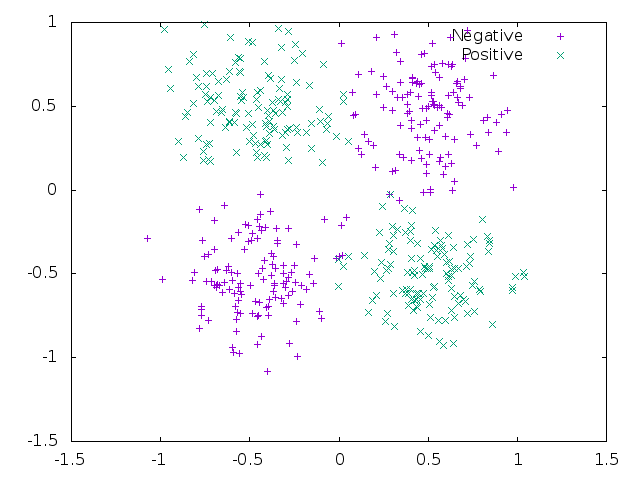

In [45]:
plot_dataset(xor_data)

In [46]:
def create_problem_xor
  rng = Distribution::Normal.rng(0,0.2,293891)
  problem_xor = Hash.new {|h,k| h[k] = 0.0}
  
  problem_xor["weights"] = Hash.new {|h,k| h[k] = rng.call}
  problem_xor["layers"] = [
    [LinearUnit.new("wx1", problem_xor["weights"]), LinearUnit.new("wx2", problem_xor["weights"])],
    [Sigmoid.new("sig1"), Sigmoid.new("sig2")],
    [LinearUnit.new("wx3", problem_xor["weights"])],
    [LogLoss.new]
  ]
    
  connect problem_xor["layers"][0][0], problem_xor["layers"][1][0]
  connect problem_xor["layers"][0][1], problem_xor["layers"][1][1]
  connect problem_xor["layers"][1][0], problem_xor["layers"][2][0]
  connect problem_xor["layers"][1][1], problem_xor["layers"][2][0]
  connect problem_xor["layers"][2][0], problem_xor["layers"][3][0]
  
  problem_xor["learning_rate"] = 0.1

 

  return problem_xor
end

:create_problem_xor

In [47]:
def test_neural_network_xor problem, examples
  cumulative_loss = 0.0
  i = 0

  obj = NeuralNetwork.new problem["layers"]
  sgd = StochasticGradientDescent.new obj, problem["weights"], problem["learning_rate"]
  500.times do |epoch|
    examples.each_slice(10) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts [i, cumulative_loss / i].join("\t") if i % 100 == 0
      break if cumulative_loss / i < 0.3
    end
    break if cumulative_loss / i < 0.3
  end
  
  predictions = obj.predict examples
  scores = predictions.collect.with_index {|score, i| [score, examples[i]["label"] > 0 ? 1 : 0]}
  auc = AUCMetric.new.apply scores
  puts "AUC: #{auc}"
 
  assert_true(cumulative_loss / i < 0.3)
  assert_true(auc > 0.9)
  return obj
end

trained_xor_model = test_neural_network_xor(create_problem_xor(), xor_data)
nil

100	0.6931313051867077
200	0.6931131398787208
300	0.693094984830101
400	0.6930756931551216
500	0.6930542257655135
600	0.6930292479557794
700	0.6929983990194073
800	0.692956232228183
900	0.692886923740621
1000	0.692728975311568
1100	0.6921301660133109
1200	0.689343392419199
1300	0.6827773665057524
1400	0.6710561372703042
1500	0.6486016590834468
1600	0.6225522658312346
1700	0.5975471940257198
1800	0.5745223597078487
1900	0.5535408418028519
2000	0.5344523369254559
2100	0.5170610919159339
2200	0.50117512425396
2300	0.48662057232179007
2400	0.4732445771100365
2500	0.46091428371114207
2600	0.4495146543192975
2700	0.43894608383486683
2800	0.42912217397671654
2900	0.4199677753037237
3000	0.41141731050905084
3100	0.4034133567217937
3200	0.3959054536163274
3300	0.38884910323068134
3400	0.3822049303495329
3500	0.37593797646258403
3600	0.3700171045349974
3700	0.36441449567089057
3800	0.3591052220685003
3900	0.3540668834488561
4000	0.34927929643786704
4100	0.34472422826252114
4200	0.340385167654321

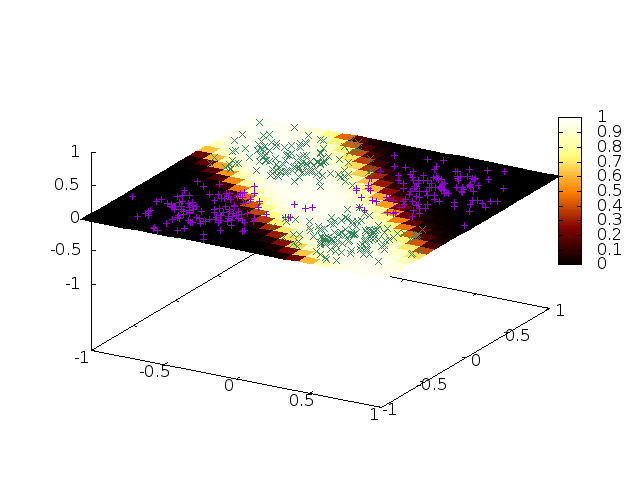

In [38]:
plot_decision_boundary xor_data, trained_xor_model

## Question 6.1 (5 points)
Using a 3-layer neural network achieve an $\log$ training loss of less than 0.2 on the concentric circles dataset. You will initialize a ```problem``` Hash with a weights initializer and the layers. You are free to choose the activation and any layers. We will standardize on the ```LogLoss``` for this dataset, which you will need to add. Don't forget to connect your nodes.

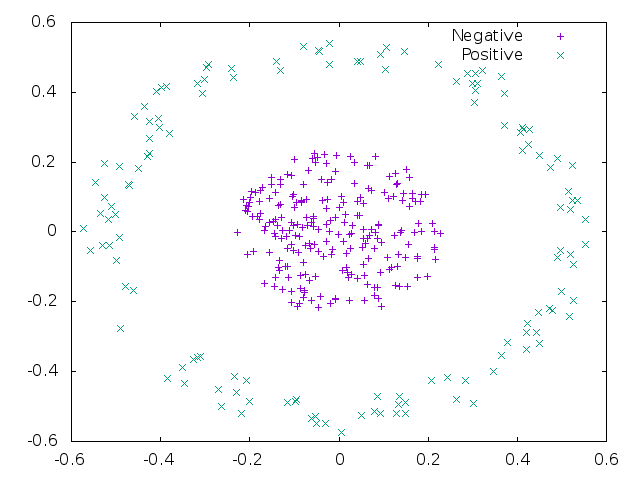

In [39]:
plot_dataset concentric_circle_data

In [48]:
def create_problem_concentric
  rng = Distribution::Normal.rng(0,0.2,293891)
  problem_concentric = Hash.new {|h,k| h[k] = 0.0}
  
  problem_concentric["weights"] = Hash.new {|h,k| h[k] = rng.call}
  problem_concentric["layers"] = [
    [LinearUnit.new("wx1", problem_concentric["weights"]), LinearUnit.new("wx2", problem_concentric["weights"]),LinearUnit.new("wx3", problem_concentric["weights"]),LinearUnit.new("wx4", problem_concentric["weights"])],
    [Sigmoid.new("sig1"), Sigmoid.new("sig2"),Sigmoid.new("sig3"),Sigmoid.new("sig4")],
    [LinearUnit.new("wx5", problem_concentric["weights"])],
    [LogLoss.new]
  ]
    
  connect problem_concentric["layers"][0][0], problem_concentric["layers"][1][0]
  connect problem_concentric["layers"][0][1], problem_concentric["layers"][1][1]
  connect problem_concentric["layers"][0][2], problem_concentric["layers"][1][2]
  connect problem_concentric["layers"][0][3], problem_concentric["layers"][1][3]

  connect problem_concentric["layers"][1][0], problem_concentric["layers"][2][0]
  connect problem_concentric["layers"][1][1], problem_concentric["layers"][2][0]
  connect problem_concentric["layers"][1][2], problem_concentric["layers"][2][0]
  connect problem_concentric["layers"][1][3], problem_concentric["layers"][2][0]

  
  connect problem_concentric["layers"][2][0], problem_concentric["layers"][3][0]
  
  problem_concentric["learning_rate"] = 0.2

 

  return problem_concentric
end

:create_problem_concentric

In [50]:
def test_neural_network_concentric problem, examples
  cumulative_loss = 0.0
  i = 0

  obj = NeuralNetwork.new problem["layers"]
  sgd = StochasticGradientDescent.new obj, problem["weights"], problem["learning_rate"]
  500.times do |epoch|
    examples.each_slice(10) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts [i, cumulative_loss / i].join("\t") if i % 100 == 0
      break if cumulative_loss / i < 0.4
    end
    break if cumulative_loss / i < 0.4
  end
  
  predictions = obj.predict examples
  scores = predictions.collect.with_index {|score, i| [score, examples[i]["label"] > 0 ? 1 : 0]}
  auc = AUCMetric.new.apply scores
  puts "AUC: #{auc}"
 
  assert_true(cumulative_loss / i < 0.4)
  assert_true(auc > 0.9)

  
  return obj
end

trained_concentric_model = test_neural_network_concentric(create_problem_concentric(), concentric_circle_data)
nil

100	0.6133477537827008
200	0.615875827537725
300	0.6176838102487325
400	0.6186020945979342
500	0.6189862460211437
600	0.6201571447836639
700	0.6204639718377176
800	0.6204625420089629
900	0.6208779821302718
1000	0.6210342942616823
1100	0.6205465697714679
1200	0.6186521866278505
1300	0.6136298308042918
1400	0.6076983406398503
1500	0.6019333328541924
1600	0.5964854741703611
1700	0.5911574436824616
1800	0.5853862910202849
1900	0.574600009679945
2000	0.5614812917726005
2100	0.5487342919454499
2200	0.5364924013467457
2300	0.5251547901485667
2400	0.514729814421625
2500	0.5047792111573646
2600	0.49568384312970587
2700	0.48731233097274873
2800	0.4791911265409577
2900	0.47159661199161956
3000	0.46423971138628206
3100	0.45493871110610806
3200	0.4433546396773337
3300	0.4312530853613895
3400	0.4194540654941788
3500	0.4081222356094688
AUC: 1.0000000000000013


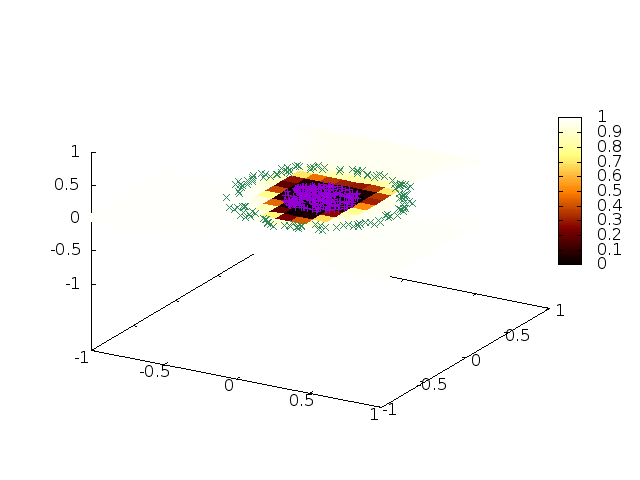

In [51]:
plot_decision_boundary(concentric_circle_data, trained_concentric_model)